In [74]:
import tensorflow
print(tensorflow.__version__)

2.18.0


In [75]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
data=pd.read_csv("/content/aps_data.csv")

/tmp/ipython-input-931750068.py:1: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/aps_data.csv")


In [77]:
df = data.copy()

In [78]:
df.shape

(5000, 171)

In [83]:
df.dtypes

,0
class,object
aa_000,int64
ab_000,object
ac_000,object
ad_000,object
...,...
ee_007,object
ee_008,object
ee_009,object
ef_000,object


In [84]:
df.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0


In [85]:
df1 = df.drop(columns=['class'])

In [86]:
df1.shape

(5000, 170)

In [87]:
df1.select_dtypes(include=['object'])

,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,0,0,0,0,0,0,0,0,614,...,26,8,26,52,0,0,0,0,0,0
1,0,0,66,0,0,0,0,0,0,10,...,1268,526,554,300,118,260,0,0,0,0
2,na,16,14,0,0,0,0,0,0,120,...,480,84,74,50,46,0,0,0,0,0
3,na,14,12,0,0,0,0,0,0,17950,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,na,12,10,0,0,0,0,1464,4980,13632,...,1010,132,310,56,92,1292,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,na,0,na,0,0,0,0,0,0,2814,...,393008,207182,367634,267778,106778,48688,57146,638,0,0
4996,na,0,na,0,0,0,0,0,0,176,...,5298,3164,9710,47042,2296,1098,3288,272,0,0
4997,2,2130706454,56,0,0,0,0,0,0,1780,...,660,272,334,76,14,0,0,0,0,0
4998,na,0,na,0,0,0,0,0,0,91648,...,533772,37122,56252,23188,1138,134,22,0,0,0


In [88]:
df1.columns

Index(['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
       'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=170)

In [89]:
for col in df1.columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

In [90]:
df1.dtypes

,0
aa_000,int64
ab_000,float64
ac_000,float64
ad_000,float64
ae_000,float64
...,...
ee_007,float64
ee_008,float64
ee_009,float64
ef_000,float64


In [92]:
df1.isnull().sum().sort_values(ascending=False)

,0
br_000,4105
bq_000,4043
bp_000,3960
cr_000,3849
ab_000,3849
...,...
ck_000,38
ci_000,38
cj_000,38
bt_000,12


In [93]:
for col in df1.columns:
    if df1[col].isnull().sum() > 0:
        df1[col].fillna(df1[col].median(), inplace=True)

/tmp/ipython-input-2371295382.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].median(), inplace=True)


In [94]:
df1.isnull().sum().sort_values(ascending=False)

,0
aa_000,0
ab_000,0
ac_000,0
ad_000,0
ae_000,0
...,...
ee_007,0
ee_008,0
ee_009,0
ef_000,0


In [98]:
df["class"].shape

(5000,)

In [99]:
df1.shape

(5000, 170)

In [100]:
x = df1

In [101]:
x.shape

(5000, 170)

In [102]:
y = df["class"]

In [103]:
y.shape

(5000,)

In [104]:
y= pd.get_dummies(y,drop_first=True)

In [105]:
y

,pos
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


In [106]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 170), (1000, 170), (4000, 1), (1000, 1))

In [110]:
from sklearn.preprocessing import StandardScaler

In [118]:
sc = StandardScaler()
X_train_scl = sc.fit_transform(X_train)
X_test_scl = sc.transform(X_test)

In [112]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [113]:
classifier =Sequential()

classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu',input_dim =170))

classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform', activation='relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [115]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         1,710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,831 (7.15 KB)

 Trainable params: 1,831 (7.15 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
model_history = classifier.fit(X_train_scl, y_train, batch_size=10, epochs=30, validation_split=0.25)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8315 - loss: 0.4193 - val_accuracy: 0.9820 - val_loss: 0.0991
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9816 - loss: 0.0875 - val_accuracy: 0.9800 - val_loss: 0.0585
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9881 - loss: 0.0397 - val_accuracy: 0.9790 - val_loss: 0.0566
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9898 - loss: 0.0308 - val_accuracy: 0.9800 - val_loss: 0.0540
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0216 - val_accuracy: 0.9870 - val_loss: 0.0488
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9923 - loss: 0.0234 - val_accuracy: 0.9850 - val_loss: 0.0492
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9936 - loss: 0.0154 - val_accuracy: 0.9840 - val_loss: 0.0570
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9932 - loss: 0.0199 - val_accuracy: 0.

In [120]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [121]:
model_history.history['accuracy']

[0.9229999780654907,
 0.9853333234786987,
 0.987333357334137,
 0.9900000095367432,
 0.9919999837875366,
 0.9916666746139526,
 0.9936666488647461,
 0.9929999709129333,
 0.9956666827201843,
 0.9950000047683716,
 0.9956666827201843,
 0.9946666955947876,
 0.9953333139419556,
 0.9959999918937683,
 0.9973333477973938,
 0.9973333477973938,
 0.9956666827201843,
 0.996666669845581,
 0.9976666569709778,
 0.9973333477973938,
 0.9956666827201843,
 0.9973333477973938,
 0.9983333349227905,
 0.9980000257492065,
 0.996999979019165,
 0.9983333349227905,
 0.9993333220481873,
 0.9993333220481873,
 0.999666690826416,
 0.999666690826416]

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


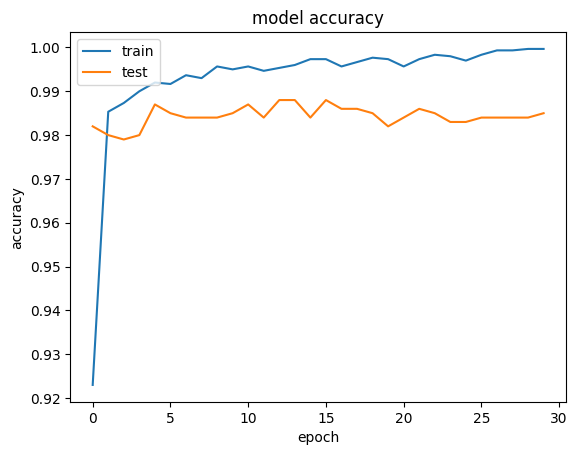

In [122]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

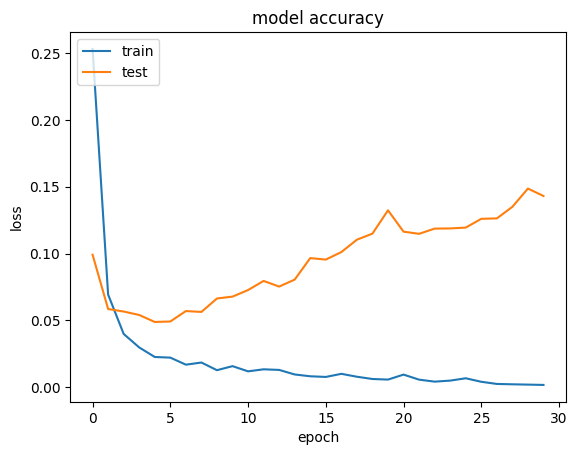

In [123]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [124]:
y_pred=classifier.predict(X_test_scl)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [125]:
#for the sigmoid my threshold is 0.

In [126]:
y_pred = y_pred>0.5

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
confusion_matrix(y_test,y_pred)

array([[980,   6],
       [  5,   9]])